In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import os

%load_ext autoreload
%autoreload 2

import pyPALM.registration as reg

In [2]:
scaffold = pd.read_hdf("../fixtures/Scaffold.h5", "processed")

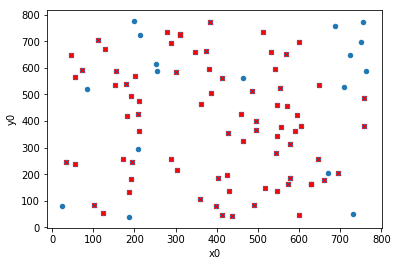

In [3]:
ax = scaffold.plot.scatter("x0", "y0")
scaffold[abs(scaffold.sigma_z < 50)].plot.scatter("x0", "y0", ax=ax, marker="x", color="r")

In [4]:
palm_fiducials_532 = pd.read_hdf("../fixtures/test_fiducials.h5", "nm532")

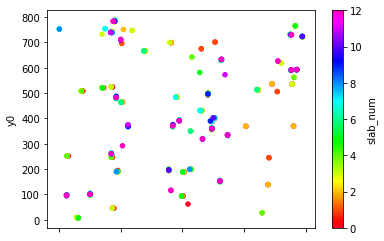

In [5]:
palm_fiducials_532.plot.scatter("x0", "y0", c="slab_num", cmap="gist_rainbow")

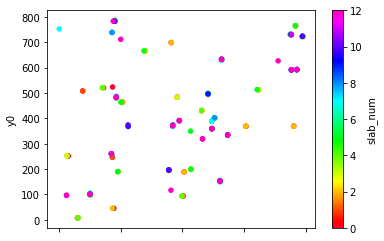

In [6]:
palm_fiducials_532[palm_fiducials_532.sigma_z < 0.5].plot.scatter("x0", "y0", c="slab_num", cmap="gist_rainbow")

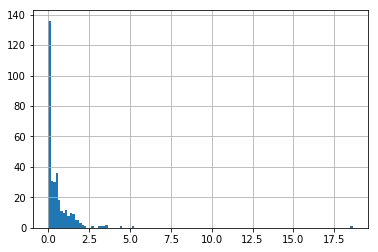

In [7]:
palm_fiducials_532.sigma_z.hist(bins=128)

Variance has dropped below machine precision, setting to 0.001
Variance has dropped below machine precision, setting to 0.001
Variance has dropped below machine precision, setting to 0.001
Variance has dropped below machine precision, setting to 0.001
Variance has dropped below machine precision, setting to 0.001
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in double_scalars
Variance has dropped below machine precision, setting to 0.001
Variance has dropped below machine precision, setting to 0.001
Variance has dropped below machine precision, setting to 0.001
Variance has dropped below machine precision, setting to 0.001
Variance has dropped below machine precision, setting to 0.001
Variance has dropped below machine precision, setting to 0.001
Variance has dropped below machine precision, setting to 0.001
Variance has dropped below machine precision, setting to 0.001
Variance has dropped below machine precision, setting t

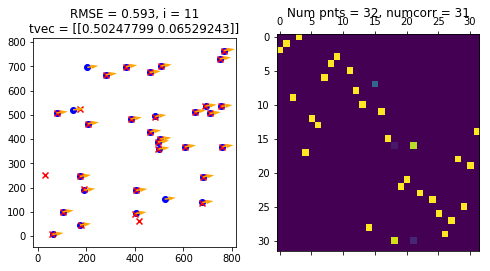

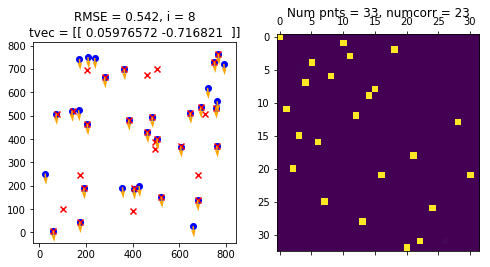

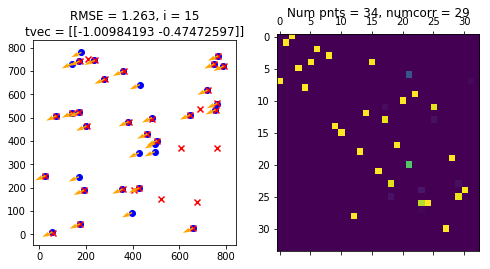

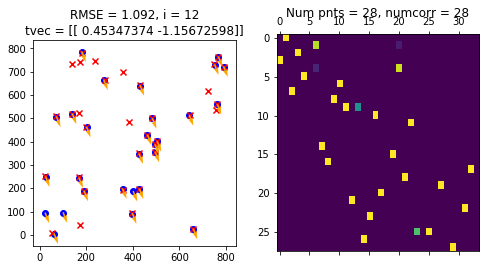

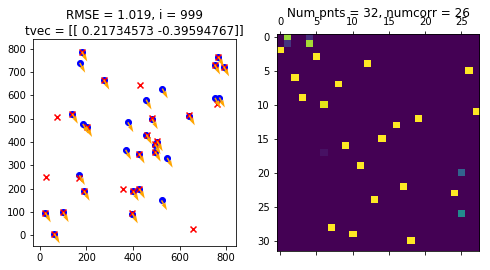

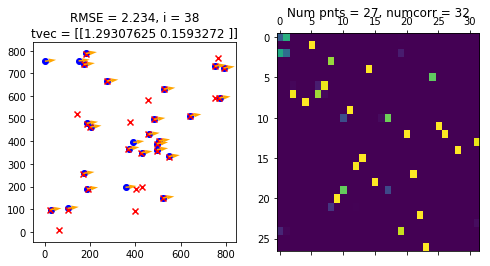

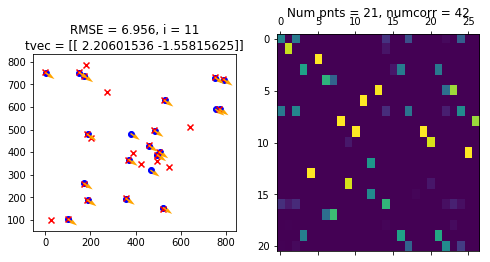

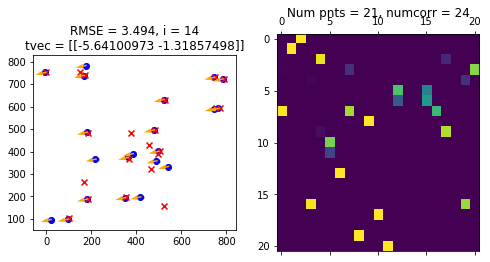

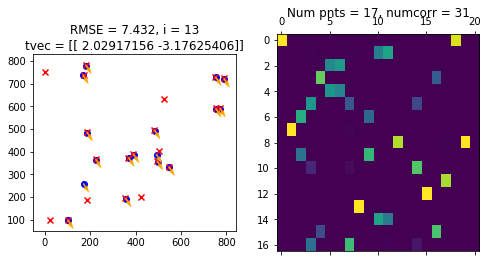

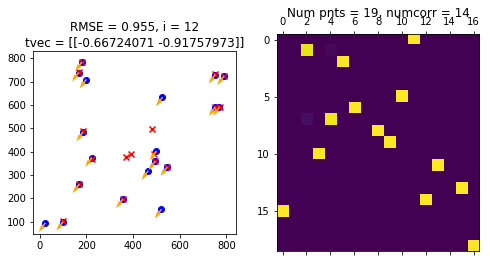

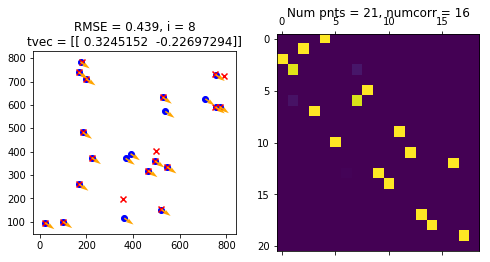

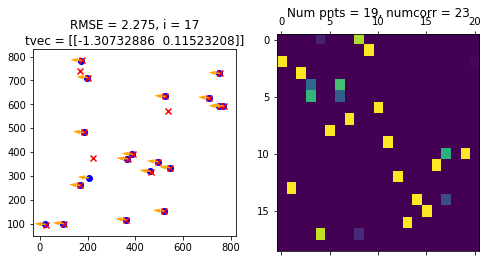

In [25]:
def get_slab(df, slab_num):
    return df[df.slab_num == slab_num][["x0", "y0", "z0"]].values

for i in range(palm_fiducials_532.slab_num.max()):
    # grab the slabs
    slab_a = get_slab(palm_fiducials_532, i)
    slab_b = get_slab(palm_fiducials_532, i + 1)
    # normalize z
    slab_a /= (1, 1, 130 * 5)
    slab_b /= (1, 1, 130 * 5)
    # do 2d translation to find initial matches
    B = np.eye(2)
    t = np.zeros(2)
    old = new = 0
    delta = np.inf
    while delta > 1e-3:
#         aidx_3d, bidx_3d = reg.closest_point_matches(slab_a[:, :2], slab_b[:, :2] @ B.T + t, r=5)
        reg3d = reg.TranslationCPD(slab_a[:, :2], slab_b[:, :2])
#         reg3d.estimate()
        reg3d(weight=0.1, tol=1e-3)
        B, t = reg3d.B, reg3d.translation
        old, new = new, reg3d.rmse
        delta = abs((old - new) / old)
    reg3d.plot()
    # translation in 3D
#     reg3d = reg.TranslationCPD(slab_a[aidx_2d], slab_b[bidx_2d])
#     reg3d(weight=0.1, tol=1e-3)
#     reg3d.plot()

(<Figure size 576x288 with 2 Axes>,
 (<matplotlib.axes._subplots.AxesSubplot at 0x1c2070ac18>,
  <matplotlib.axes._subplots.AxesSubplot at 0x1c21202240>))

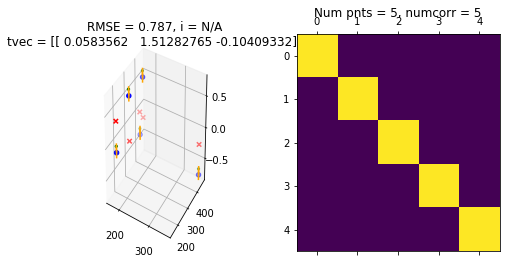

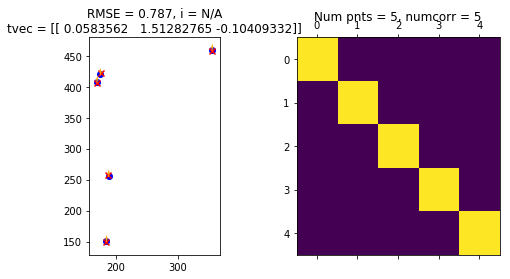

In [18]:
reg3d.plot()
reg3d.plot(True)

In [35]:
myreg = reg.TranslationCPD(slab_a[["x0", "y0"]].values, slab_b[["x0", "y0"]].values)

Variance has dropped below machine precision, setting to 0.001
Variance has dropped below machine precision, setting to 0.001
Variance has dropped below machine precision, setting to 0.001
Variance has dropped below machine precision, setting to 0.001
Variance has dropped below machine precision, setting to 0.001


(<Figure size 576x288 with 2 Axes>,
 (<matplotlib.axes._subplots.AxesSubplot at 0x1c247ab860>,
  <matplotlib.axes._subplots.AxesSubplot at 0x1c2561b400>))

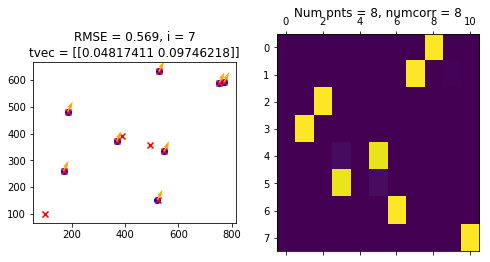

In [37]:
myreg(weight=0.1, tol=1e-3)
myreg.plot()

In [39]:
aidx, bidx = myreg.matches

(<Figure size 576x288 with 2 Axes>,
 (<matplotlib.axes._subplots.AxesSubplot at 0x1c25ecd470>,
  <matplotlib.axes._subplots.AxesSubplot at 0x1c25fe5710>))

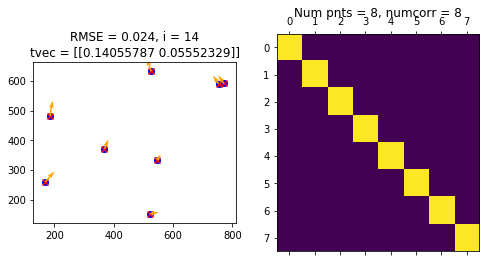

In [47]:
myreg = reg.AffineCPD(slab_a[["x0", "y0"]].values[aidx], slab_b[["x0", "y0"]].values[bidx])
myreg()
myreg.plot()

(array([[ 9.99965559e-01, -2.55404527e-04,  9.57647612e-05],
        [ 3.50845641e-05,  1.00002196e+00,  4.46634190e-04],
        [-1.26345460e-01, -3.03661009e-02,  1.24996912e+00]]),
 array([[1.59318147e-01, 1.43018750e-01, 3.90042604e+02]]))

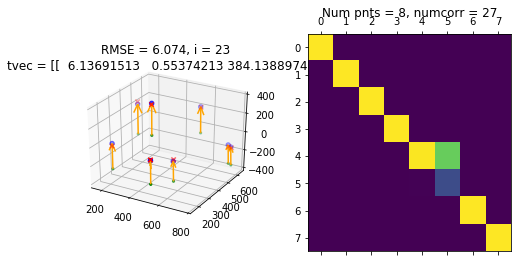

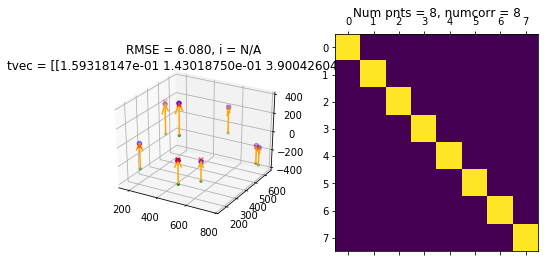

In [53]:
myreg = reg.AffineCPD(slab_a[["x0", "y0", "z0"]].values[aidx], slab_b[["x0", "y0", "z0"]].values[bidx])
myreg()
myreg.plot()
myreg.estimate()
myreg.plot()
myreg.B, myreg.translation

(<Figure size 576x288 with 2 Axes>,
 (<matplotlib.axes._subplots.Axes3DSubplot at 0x1c264c45c0>,
  <matplotlib.axes._subplots.AxesSubplot at 0x1c26579390>))

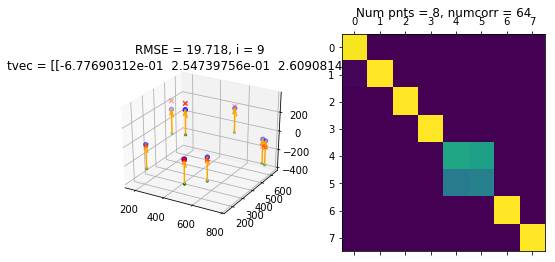

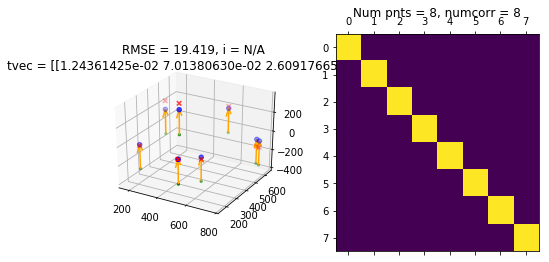

In [50]:
myreg = reg.TranslationCPD(slab_a[["x0", "y0", "z0"]].values[aidx], slab_b[["x0", "y0", "z0"]].values[bidx])
myreg()
myreg.plot()
myreg.estimate()
myreg.plot()